# 문제정의
- 타이타닉 데이터를 사용해서 생존자와 사망자를 예측하기
- kaggle 경진대회에서 높은 순위 차지

# 데이터 수집
- kaggle 사이트로부터 데이터 수집

In [112]:
import pandas as pd 
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.shape, test.shape


((891, 12), (418, 11))

- 분석 feature : Pclass, Age, SibSp, Parch, Fare...
- 예측 target label : Survived

- feature 

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer 
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

# 데이터 전처리

## 정답 컬럼 분리

In [113]:
y_train = train['Survived']

## 결측치 확인
- info()

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## PassengerId 삭제

In [116]:
train.drop("PassengerId", axis= 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

In [117]:
train.shape, test.shape

((891, 11), (418, 10))

## Embarked 채우기
- 최빈값으로 채우기

In [118]:
train['Embarked'].value_counts() #데이터의 값이 얼마나 있는지

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
train['Embarked'].fillna('S', inplace = True)

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Fare 채우기
- 중앙값으로 채우기

In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [122]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [123]:
test['Fare'].fillna(14.4542, inplace = True)

## Age 채우기
- 다른 컬럼과의 상관관계를 통해서 데이터 채우기

In [124]:
# 수치형컬럼들간에 상관관계를 확인
train.corr() 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [125]:
# .groupby(by = 'Pclass') : 티켓등급이 같은 데이터들끼리 뭈음
age_table = train[['Pclass', 'Sex', 'Age']].groupby(by = ['Pclass', 'Sex']).median()

In [126]:
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [127]:
train.iloc[0]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 0, dtype: object

### age의 결측치를 채워줄 함수 만들기

In [128]:
import numpy as np

In [129]:
def fill_age(person):
    if np.isnan(person['Age']):
        return age_table.loc[person['Pclass'], person['Sex']][0]
    else : 
        return person['Age']

In [130]:
 # apply : 행이나 열 별로 데이터를 출력하고 지정해둔 함수에 작용
train['Age'] = train.apply(fill_age, axis = 1)

In [131]:
test['Age'] = test.apply(fill_age, axis = 1)

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Cabin 채우기
 - 결측치의 비율이 너무 높기때문에 결측치 자체를 하나의 데이터로 활용

In [133]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [134]:
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [135]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [136]:
train['Cabin'].fillna('N', inplace = True)
test['Cabin'].fillna('N', inplace = True)

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 탐색적 데이터 분석

In [138]:
# 시각화 라이브러리
import seaborn as sns

## Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

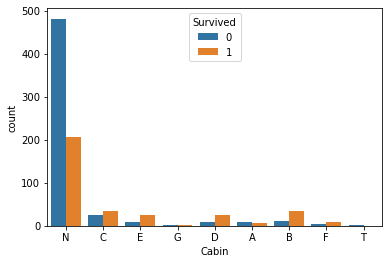

In [139]:
sns.countplot(data = train, x = 'Cabin', hue = 'Survived')

- N에서 사망한 사람의 비율이 높다.
- 임의로 채운 N 값을 분석에 사용해도 괜찮을것같다.

##  Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

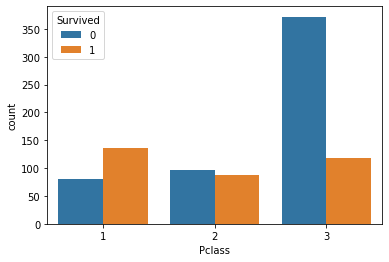

In [140]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

## Embarked와 Pclass 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

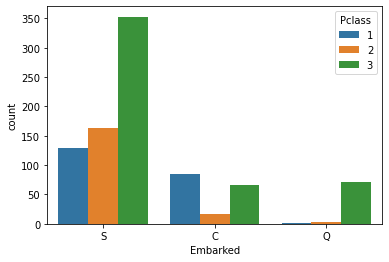

In [141]:
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')

## Sex, Age, Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

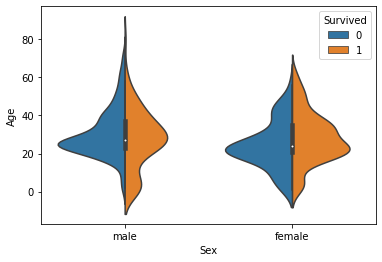

In [142]:
sns.violinplot(data = train, x = 'Sex', y = 'Age', hue = 'Survived', split = True )

## Sibsp, Parch 시각화
 - 특성공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보를 추출하는 행위
 - Sibsp + Parch + 1 = Family_size 컬럼생성

In [143]:
train['Family_size'] = train['SibSp']+ train['Parch']+1

In [144]:
test['Family_size'] = test['SibSp']+ test['Parch']+1

<AxesSubplot:xlabel='Family_size', ylabel='count'>

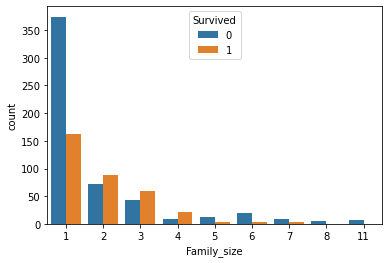

In [145]:
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')

In [146]:
bins = [0, 1, 4, 20] # 구간정보
labels = ['Alone', 'Small', 'Large'] #구간에 대한 범주 이름

In [147]:
train['Family_group']= pd.cut(train['Family_size'], bins=bins, labels= labels)
test['Family_group']= pd.cut(test['Family_size'], bins=bins, labels= labels)

In [148]:
#

In [149]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,Alone


### Family_group 시각화


<AxesSubplot:xlabel='Family_group', ylabel='count'>

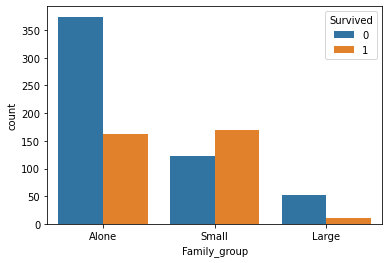

In [150]:
sns.countplot(data= train, x= 'Family_group', hue='Survived')

## Text 데이터
- Name, Ticket
- 비정형데이터(사용하는 단어나 길이가 전부 다름)
- 비정형데이터를 정형 데이터로 변경해서 사용할수 있게하자

In [151]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [152]:
train['Name'][0].split(',')[1].split('.')[0].strip()

'Mr'

### Name 전처리 함수 만들기

In [153]:
def split_name(name):
    return name.split(',')[1].split('.')[0].strip()

In [154]:
train['Name'] = train['Name'].apply(split_name)
test['Name'] = test['Name'].apply(split_name)

In [155]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [156]:
convert_title_dic = {
    'Mr' : 'Mr' , 
    'Mrs' : 'Mrs', 
    'Miss' : 'Miss', 
    'Master' : 'Master', 
    'Don' : 'Other', 
    'Rev' : 'Rev', 
    'Dr': 'Dr', 
    'Mme' : 'Other', 
    'Ms' : 'Other',
    'Major' : 'Other',
    'Lady' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other', 
    'Capt' : 'Other', 
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'
}

In [157]:
train['Name'] = train['Name'].map(convert_title_dic)

In [158]:
test['Name'] = test['Name'].map(convert_title_dic)

In [159]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

### Ticket 전처리

In [160]:
len(train['Ticket'].unique())

681

In [161]:
train.drop('Ticket', axis = 1, inplace= True)
test.drop('Ticket', axis = 1, inplace= True)

In [162]:
train.shape, test.shape

((891, 12), (418, 11))

In [163]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Fare          891 non-null    float64 
 8   Cabin         891 non-null    object  
 9   Embarked      891 non-null    object  
 10  Family_size   891 non-null    int64   
 11  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


## 글자데이터를 숫자데이터로 변경
- 원핫인코딩
- Name, Sex, Cabin, Embarked, Family_group

In [165]:
categorical_feature = ['Name', 'Sex', 'Cabin', 'Embarked', 'Family_group']

In [167]:
train.drop('Survived', axis = 1, inplace=True)

In [168]:
combined = pd.concat([train, test], ignore_index=True)

In [171]:
combined

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Family_group
0,3,Mr,male,22.0,1,0,7.2500,N,S,2,Small
1,1,Mrs,female,38.0,1,0,71.2833,C,C,2,Small
2,3,Miss,female,26.0,0,0,7.9250,N,S,1,Alone
3,1,Mrs,female,35.0,1,0,53.1000,C,S,2,Small
4,3,Mr,male,35.0,0,0,8.0500,N,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone
1305,1,Other,female,39.0,0,0,108.9000,C,C,1,Alone
1306,3,Mr,male,38.5,0,0,7.2500,N,S,1,Alone
1307,3,Mr,male,25.0,0,0,8.0500,N,S,1,Alone


In [174]:
# 원핫인코딩
one_hot = pd.get_dummies(combined[categorical_feature])
one_hot.shape

(1309, 24)

In [177]:
combined.drop(categorical_feature, axis = 1, inplace = True )

In [178]:
combined = pd.concat([combined, one_hot], axis= 1)

In [179]:
combined.shape

(1309, 30)

# 모델선택 및 하이퍼 파라미터 튜닝

## 데이터 나누기

In [181]:
X_train = combined.iloc[:891]
X_test = combined.iloc[891:]

In [182]:
X_train.shape, X_test.shape, y_train.shape

((891, 30), (418, 30), (891,))

## 모델 불러오기

In [183]:
from sklearn.tree import DecisionTreeClassifier

In [184]:
tree_model = DecisionTreeClassifier()

In [185]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [186]:
pre = tree_model.predict(X_test)

In [187]:
pre

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [191]:
# data폴더안에 titanic폴더가 없어서 오류가 나왔네요 ! 썜 저 페이지 도 못했어요,,,
gender_sub = pd.read_csv('./data/gender_submission.csv')
gender_sub['Survived'] = pre # 모델의 예측결과를 제출양식에 담기
gender_sub.to_csv('mysub01.csv',index=False) # csv파일로 뽑아내기 

In [192]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Name_Dr,Name_Master,Name_Miss,Name_Mr,...,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Family_group_Alone,Family_group_Small,Family_group_Large
0,3,22.0,1,0,7.2500,2,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,3,35.0,0,0,8.0500,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


## 교차검증

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
result = cross_val_score(tree_model, X_train, y_train, cv=5)
result.mean()

0.7901261691042623

In [195]:
tree_model.score(X_train, y_train)

0.9865319865319865

## RandomForest

In [200]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200) # 200개의 DecisionTree사용

In [201]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [202]:
result = cross_val_score(forest, X_train, y_train, cv = 5)
result.mean()

0.7968363567886512